#### AP21110010839-Beecha Venkta Naga Hareesh
#### AP21110010022-Tadiparthy Mani Dheeraj Kumar
#### AP21110010045-Reethu Bhargavi Sajjala
#### AP21110011172- Lahari Kotapati

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import matplotlib.ticker as ticker
import seaborn as sns
from matplotlib.ticker import MultipleLocator
from sklearn import metrics
from sklearn.linear_model import LinearRegression



from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

from category_encoders import LeaveOneOutEncoder
from category_encoders.target_encoder import TargetEncoder
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc


to convert the string values to numeric

In [55]:
# from sklearn.preprocessing import LabelEncoder

# # Define columns to be label encoded
# columns_to_encode =  ['Gender', 'Country', 'Occupation', 'treatment', 'Mental_Health_History',
#                         'Coping_Struggles', 'Work_Interest', 'Social_Weakness', 
#                         'mental_bhealth_interview', 'care_options','self_employed', 'family_history','Days_Indoors','Growing_Stress','Changes_Habits','Mood_Swings']  # Replace with your column names

# # Apply label encoding
# label_encoder = LabelEncoder()
# for col in columns_to_encode:
#     df[col] = label_encoder.fit_transform(df[col])
# df.to_csv('encoded_Mental Health Dataset.csv', index=False)

In [56]:
df = pd.read_csv('Mental Health Dataset.csv')
df.head()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,8/27/2014 11:31,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,8/27/2014 11:32,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


In [57]:
df.shape

(292364, 17)

In [58]:
df.describe()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
count,292364,292364,292364,292364,287162,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364
unique,580,2,35,5,2,2,2,5,3,3,3,3,2,3,3,3,3
top,8/27/2014 11:43,Male,United States,Housewife,No,No,Yes,1-14 days,Maybe,Yes,No,Medium,No,No,Maybe,No,No
freq,2384,239850,171308,66351,257994,176832,147606,63548,99985,109523,104018,101064,154328,105843,103393,232166,118886


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292364 entries, 0 to 292363
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Timestamp                292364 non-null  object
 1   Gender                   292364 non-null  object
 2   Country                  292364 non-null  object
 3   Occupation               292364 non-null  object
 4   self_employed            287162 non-null  object
 5   family_history           292364 non-null  object
 6   treatment                292364 non-null  object
 7   Days_Indoors             292364 non-null  object
 8   Growing_Stress           292364 non-null  object
 9   Changes_Habits           292364 non-null  object
 10  Mental_Health_History    292364 non-null  object
 11  Mood_Swings              292364 non-null  object
 12  Coping_Struggles         292364 non-null  object
 13  Work_Interest            292364 non-null  object
 14  Social_Weakness     

In [6]:
df.isnull().sum()

Timestamp                     0
Gender                        0
Country                       0
Occupation                    0
self_employed              5202
family_history                0
treatment                     0
Days_Indoors                  0
Growing_Stress                0
Changes_Habits                0
Mental_Health_History         0
Mood_Swings                   0
Coping_Struggles              0
Work_Interest                 0
Social_Weakness               0
mental_health_interview       0
care_options                  0
dtype: int64

cleared the null values

In [60]:
df = pd.read_csv('cleaned Mental Health Dataset.csv')
df.head()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
1,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
2,8/27/2014 11:49,Female,Poland,Corporate,No,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Not sure
3,8/27/2014 11:51,Female,Australia,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
4,8/27/2014 11:52,Female,United States,Corporate,No,No,No,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No


In [61]:
df.isnull().sum()

Timestamp                  0
Gender                     0
Country                    0
Occupation                 0
self_employed              0
family_history             0
treatment                  0
Days_Indoors               0
Growing_Stress             0
Changes_Habits             0
Mental_Health_History      0
Mood_Swings                0
Coping_Struggles           0
Work_Interest              0
Social_Weakness            0
mental_health_interview    0
care_options               0
dtype: int64

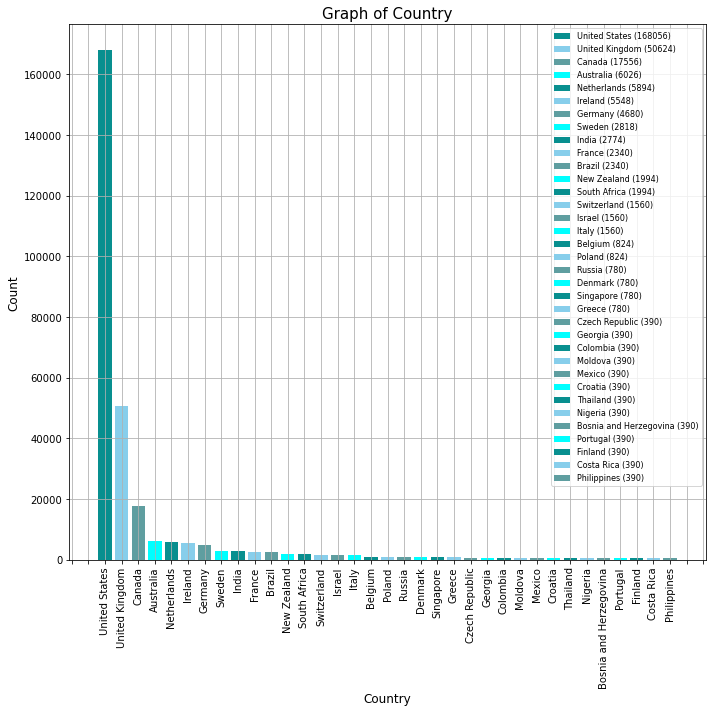

In [62]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

specific_column = 'Country'

# Define the desired colors
legend_colors = ['#088F8F','#87CEEB',  '#5F9EA0', '#00FFFF']

plt.figure(figsize=(10, 10))

value_counts = df[specific_column].value_counts()
unique_values = value_counts.index

bars = plt.bar(unique_values, value_counts.values, color=legend_colors[:len(unique_values)])
plt.title(f'Graph of {specific_column}', fontsize=15)
plt.xlabel(specific_column, fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=90, ha='center')
plt.grid(True)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))

legend_labels = [f'{value} ({count})' for value, count in zip(unique_values, value_counts.values)]
plt.legend(bars, legend_labels, loc='upper right', fontsize=8)

plt.tight_layout()
plt.show()


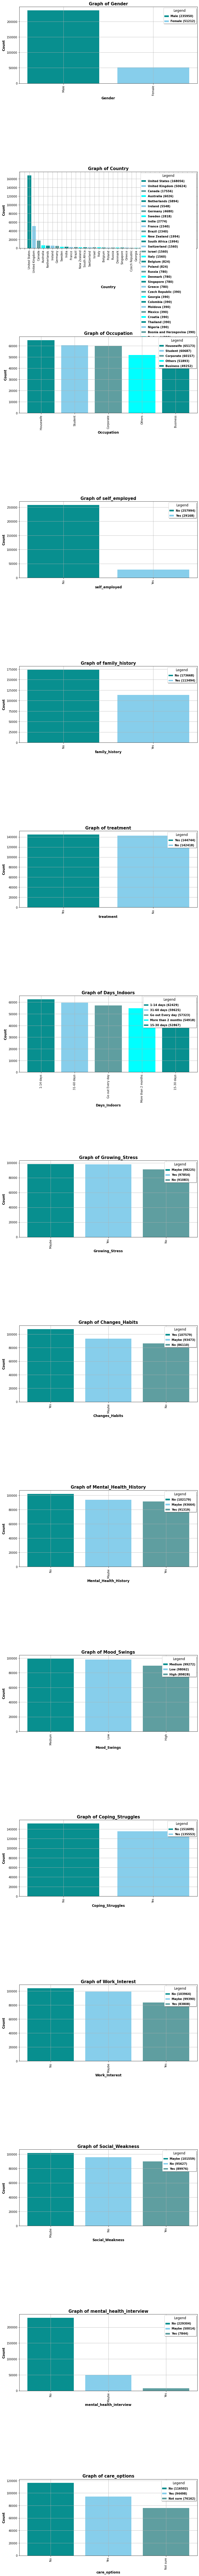

In [68]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

legend_colors = ['#088F8F', '#87CEEB', '#5F9EA0', '#00FFFF']  # Specify your desired legend colors

plt.figure(figsize=(10, 8* (len(df.columns) - 1)))

for i, column in enumerate(df.columns[1:], start=1):
    value_counts = df[column].value_counts()
    unique_values = value_counts.index

    plt.subplot(len(df.columns) - 1, 1, i)
    bars = plt.bar(unique_values, value_counts.values, color=legend_colors[:len(unique_values)])
    plt.title(f'Graph of {column}', fontsize=15, fontweight='bold')  # Bold title
    plt.xlabel(column, fontsize=12, fontweight='bold')  # Bold column name
    plt.ylabel('Count', fontsize=12, fontweight='bold')  # Bold count
    plt.xticks(rotation=90, ha='center')
    plt.grid(True)
    plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))

    legend_labels = [f'{value} ({count})' for value, count in zip(unique_values, value_counts.values)]
    legend_labels_bold = [f'{value} ({count})' for value, count in zip(unique_values, value_counts.values)]
    plt.legend(bars, legend_labels, loc='upper right', fontsize=8, title='Legend', title_fontsize='12', labelspacing=1, fancybox=True, framealpha=1, shadow=True)
    plt.setp(plt.gca().get_legend().get_texts(), fontsize='10', fontweight='bold')

plt.tight_layout()
plt.show()


In [65]:
for column in df.columns:
    print("Column:", column)
    print(df[column].value_counts())
    print()


Column: Timestamp
8/27/2014 11:43    2384
8/27/2014 12:31    2340
8/27/2014 12:53    1648
8/27/2014 12:39    1604
8/27/2014 16:21    1604
                   ... 
8/27/2014 23:54     390
8/27/2014 23:30     390
8/27/2014 23:14     390
8/27/2014 23:10     390
2/1/2016 23:04      390
Name: Timestamp, Length: 574, dtype: int64

Column: Gender
Male      235950
Female     51212
Name: Gender, dtype: int64

Column: Country
United States             168056
United Kingdom             50624
Canada                     17556
Australia                   6026
Netherlands                 5894
Ireland                     5548
Germany                     4680
Sweden                      2818
India                       2774
France                      2340
Brazil                      2340
New Zealand                 1994
South Africa                1994
Switzerland                 1560
Israel                      1560
Italy                       1560
Belgium                      824
Poland              

after converting to numeric we remove timestap column also

In [30]:
df = pd.read_csv('encoded_Mental Health Dataset.csv')
df.head()

,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,0,0,0,0,0,1,0,2,1,2,2,0,1,2,1,1
1,0,0,0,0,1,1,0,2,1,2,2,0,1,2,1,0
2,0,0,0,0,1,1,0,2,1,2,2,0,1,2,1,2
3,0,0,0,0,1,1,0,2,1,2,2,0,1,2,0,2
4,0,0,0,0,1,1,0,2,1,2,2,0,1,2,1,2


In [31]:
df.shape

(292364, 16)

In [32]:
df.describe()

,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
count,292364.000000,292364.000000,292364.000000,292364.000000,292364.000000,292364.000000,292364.000000,292364.000000,292364.000000,292364.000000,292364.000000,292364.000000,292364.000000,292364.000000,292364.000000,292364.000000
mean,0.820381,3.054111,1.958206,0.099766,0.395165,0.504871,1.963309,0.998864,1.049107,0.991757,1.032829,0.472137,0.945790,0.959687,0.853094,0.920736
std,0.383870,5.614979,1.413232,0.299688,0.488887,0.499977,1.420165,0.826342,0.835289,0.802591,0.810835,0.499224,0.796893,0.815692,0.429325,0.853071
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,1.000000,0.000000,2.000000,0.000000,0.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
75%,1.000000,4.000000,3.000000,0.000000,1.000000,1.000000,3.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2.000000
max,1.000000,34.000000,4.000000,1.000000,1.000000,1.000000,4.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000


In [33]:
for column in df.columns:
    print("Column:", column)
    print(df[column].value_counts())
    print()


Column: Gender
1    239850
0     52514
Name: Gender, dtype: int64

Column: Country
0     171308
4      51404
3      18726
2       6026
8       5894
11      5548
17      4680
6       2818
9       2774
12      2340
14      2340
7       1994
5       1994
18      1560
20      1560
21      1560
10       824
1        824
16       780
27       780
23       780
29       780
33       390
32       390
31       390
30       390
28       390
25       390
26       390
24       390
22       390
13       390
19       390
15       390
34       390
Name: Country, dtype: int64

Column: Occupation
3    66351
1    61794
0    61229
4    52841
2    50149
Name: Occupation, dtype: int64

Column: self_employed
0    263196
1     29168
Name: self_employed, dtype: int64

Column: family_history
0    176832
1    115532
Name: family_history, dtype: int64

Column: treatment
1    147606
0    144758
Name: treatment, dtype: int64

Column: Days_Indoors
0    63548
2    60705
3    58366
4    55916
1    53829
Name: Days_Ind

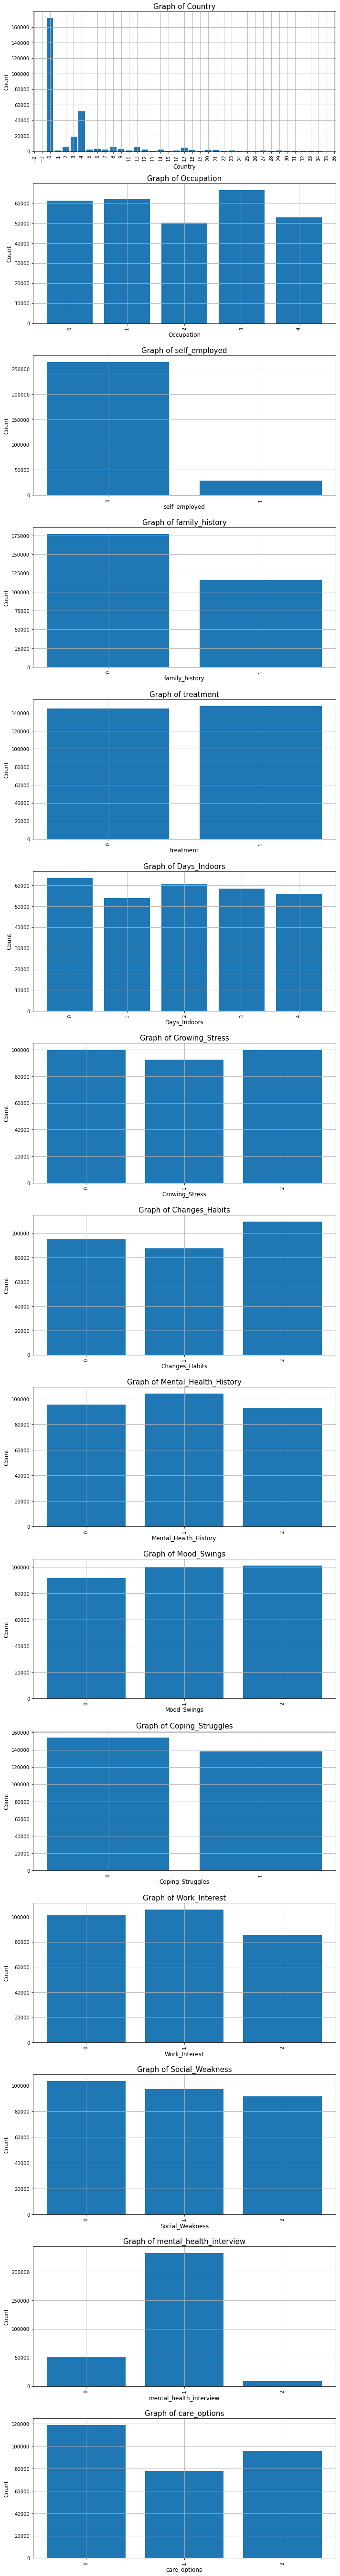

In [34]:
plt.figure(figsize=(10, 5 * (len(df.columns) - 1)))

for i, column in enumerate(df.columns[1:], start=1):
    value_counts = df[column].value_counts()
    plt.subplot(len(df.columns) - 1, 1, i)
    plt.bar(value_counts.index, value_counts.values)
    plt.title(f'Graph of {column}', fontsize=15)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=90, ha='center')  # Set rotation to 90 degrees and horizontal alignment to center
    plt.grid(True)
    plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))

plt.tight_layout()
plt.show()

In [35]:
for column in df:
  print(column)
  print(df[column].unique(), '\n')

Gender
[0 1] 

Country
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34] 

Occupation
[0 1 2 3 4] 

self_employed
[0 1] 

family_history
[0 1] 

treatment
[1 0] 

Days_Indoors
[0 3 4 1 2] 

Growing_Stress
[2 1 0] 

Changes_Habits
[1 2 0] 

Mental_Health_History
[2 1 0] 

Mood_Swings
[2 1 0] 

Coping_Struggles
[0 1] 

Work_Interest
[1 0 2] 

Social_Weakness
[2 1 0] 

mental_health_interview
[1 0 2] 

care_options
[1 0 2] 



Normalized Distribution Growing_Stress by Gender: 

Growing_Stress         0         1         2
Gender                                      
0               0.299539  0.301843  0.398618
1               0.351282  0.320513  0.328205 



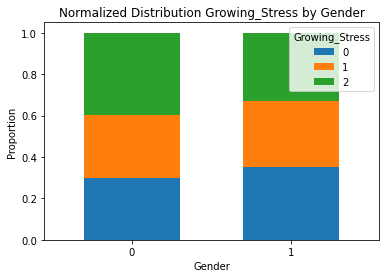

In [36]:
gender_stress_norm = df.groupby(['Gender', 'Growing_Stress']).size().unstack().div(df.groupby('Gender').size(), axis=0)
print('Normalized Distribution Growing_Stress by Gender:', '\n')
print(gender_stress_norm, '\n')

gender_stress_norm.plot(kind='bar', width=0.6, stacked=True)
plt.title('Normalized Distribution Growing_Stress by Gender')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend(title='Growing_Stress', loc='upper right')
plt.show()

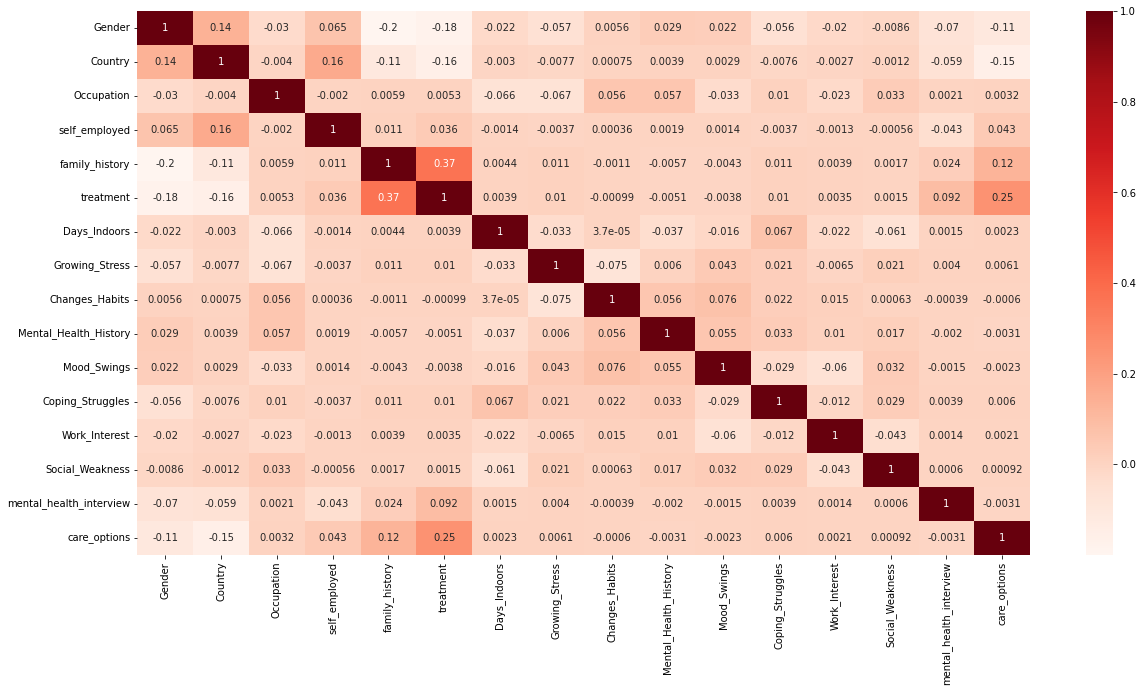

In [37]:

X_fs = df.drop(['Mood_Swings'], axis=1)
Y_fs = df['Mood_Swings']

#Using Pearson Correlation
plt.figure(figsize=(20,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [38]:
cor_target = abs(cor['Mood_Swings'])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.01]
relevant_features

Gender                   0.021604
Occupation               0.033231
Days_Indoors             0.016262
Growing_Stress           0.043442
Changes_Habits           0.076287
Mental_Health_History    0.055209
Mood_Swings              1.000000
Coping_Struggles         0.029089
Work_Interest            0.060488
Social_Weakness          0.032135
Name: Mood_Swings, dtype: float64

In [39]:
Features = ['Gender', 'Occupation', 'Days_Indoors', 'Growing_Stress', 'Changes_Habits', 'Mental_Health_History', 'Coping_Struggles', 'Work_Interest', 'Social_Weakness']

print('Full Features: ', Features)


Full Features:  ['Gender', 'Occupation', 'Days_Indoors', 'Growing_Stress', 'Changes_Habits', 'Mental_Health_History', 'Coping_Struggles', 'Work_Interest', 'Social_Weakness']


In [40]:
Target = 'Mood_Swings'
print('Target: ', Target)

Target:  Mood_Swings


In [44]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

X_train, X_test, Y_train, Y_test = train_test_split(df[Features], df[Target], test_size=0.2, random_state=42)

clf = DecisionTreeClassifier()
clf.fit(X_train, Y_train)
result = clf.predict(X_test)

ac_sc = accuracy_score(Y_test, result)
rc_sc = recall_score(Y_test, result, average="weighted")
pr_sc = precision_score(Y_test, result, average="weighted")
f1_sc = f1_score(Y_test, result, average='micro')
confusion_m = confusion_matrix(Y_test, result)

print("========== Decision Tree ==========")
print("Accuracy    : ", ac_sc)
print("Recall      : ", rc_sc)
print("Precision   : ", pr_sc)
print("F1 Score    : ", f1_sc)
print("Confusion Matrix: ")
print(confusion_m)


========== Decision Tree ==========
Accuracy    :  0.9795119114805124
Recall      :  0.9795119114805124
Precision   :  0.9795956898292385
F1 Score    :  0.9795119114805124
Confusion Matrix: 
[[17818    31   263]
 [  141 19847   132]
 [  466   165 19610]]


In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(X_train, Y_train)
result = classifier.predict(X_test)

ac_sc = accuracy_score(Y_test, result)
rc_sc = recall_score(Y_test, result, average="weighted")
pr_sc = precision_score(Y_test, result, average="weighted")
f1_sc = f1_score(Y_test, result, average='micro')
confusion_m = confusion_matrix(Y_test, result)

print("========== Gaussian Naive Bayes ==========")
print("Accuracy    : ", ac_sc)
print("Recall      : ", rc_sc)
print("Precision   : ", pr_sc)
print("F1 Score    : ", f1_sc)
print("Confusion Matrix: ")
print(confusion_m)


========== Gaussian Naive Bayes ==========
Accuracy    :  0.4122586492911258
Recall      :  0.4122586492911258
Precision   :  0.40739715206653865
F1 Score    :  0.4122586492911258
Confusion Matrix: 
[[4859 6287 6966]
 [4410 9361 6349]
 [3959 6396 9886]]


In [47]:
#randomforest
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
classifier = RandomForestClassifier()
classifier.fit(X_train, Y_train)
result = classifier.predict(X_test)
# Make predictions for the test set
ac_sc = accuracy_score(Y_test, result)
rc_sc = recall_score(Y_test, result, average="weighted")
pr_sc = precision_score(Y_test, result, average="weighted")
f1_sc = f1_score(Y_test, result, average='micro')
confusion_m = confusion_matrix(Y_test, result)

print("========== RandomForestClassifier ==========")
print("Accuracy    : ", ac_sc)
print("Recall      : ", rc_sc)
print("Precision   : ", pr_sc)
print("F1 Score    : ", f1_sc)
print("Confusion Matrix: ")
print(confusion_m)

========== RandomForestClassifier ==========
Accuracy    :  0.9795290133907958
Recall      :  0.9795290133907958
Precision   :  0.9795559810432753
F1 Score    :  0.9795290133907958
Confusion Matrix: 
[[17642    31   439]
 [  141 19847   132]
 [  289   165 19787]]


In [48]:
#KNN
from sklearn.neighbors import KNeighborsClassifier# Create KNN classifier
classifier = KNeighborsClassifier(n_neighbors = 1000)# Fit the classifier to the data

classifier.fit(X_train, Y_train)
result = classifier.predict(X_test)
# Make predictions for the test set
ac_sc = accuracy_score(Y_test, result)
rc_sc = recall_score(Y_test, result, average="weighted")
pr_sc = precision_score(Y_test, result, average="weighted")
f1_sc = f1_score(Y_test, result, average='micro')
confusion_m = confusion_matrix(Y_test, result)

print("========== KNN ==========")
print("Accuracy    : ", ac_sc)
print("Recall      : ", rc_sc)
print("Precision   : ", pr_sc)
print("F1 Score    : ", f1_sc)
print("Confusion Matrix: ")
print(confusion_m)

========== KNN ==========
Accuracy    :  0.757323893078857
Recall      :  0.757323893078857
Precision   :  0.7572622012799305
F1 Score    :  0.757323893078857
Confusion Matrix: 
[[13923  2024  2165]
 [ 2765 14713  2642]
 [ 1766  2828 15647]]


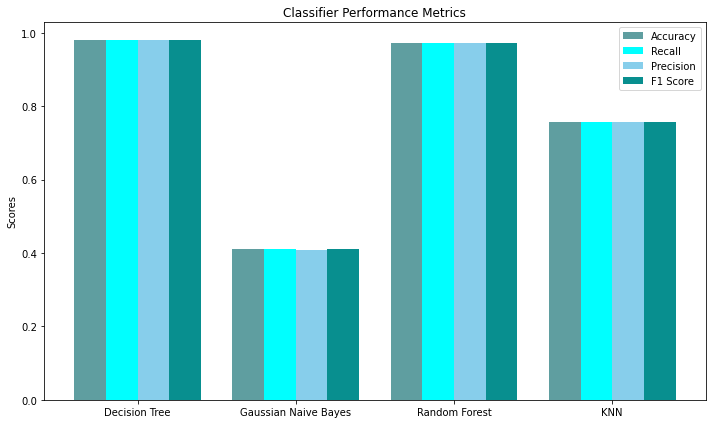

In [17]:
import matplotlib.pyplot as plt

# Classifier names
classifiers = ['Decision Tree', 'Gaussian Naive Bayes', 'Random Forest', 'KNN']

# Metric values
accuracy = [0.9795, 0.4123, 0.9712, 0.7573]
recall = [0.9795, 0.4123, 0.9712, 0.7573]
precision = [0.9796, 0.4074, 0.9712, 0.7573]
f1_score = [0.9795, 0.4123, 0.9712, 0.7573]

# Define legend labels and colors
legend_labels = ['Precision', 'F1 Score', 'Accuracy', 'Recall']
legend_colors = ['#87CEEB', '#088F8F', '#5F9EA0', '#00FFFF']

# Plotting the graph
x = range(len(classifiers))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x, accuracy, width, label=legend_labels[2], color=legend_colors[2])
rects2 = ax.bar([i + width for i in x], recall, width, label=legend_labels[3], color=legend_colors[3])
rects3 = ax.bar([i + width*2 for i in x], precision, width, label=legend_labels[0], color=legend_colors[0])
rects4 = ax.bar([i + width*3 for i in x], f1_score, width, label=legend_labels[1], color=legend_colors[1])

# Adding labels
ax.set_ylabel('Scores')
ax.set_title('Classifier Performance Metrics')
ax.set_xticks([i + 1.5 * width for i in x])
ax.set_xticklabels(classifiers)
ax.legend()

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
# SHAP importance and sklearn feature importance
import shap
shap.__version__